In [34]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels import robust
import scipy.stats as stats

### z-score vs modified z-score

In [69]:
# Create a normal and uniform distributed sample
N = 600

datan = np.random.randn(N)
datau = np.random.rand(N)**4

-0.2513051557235635
-0.37258558139765097
0.7144244349131077
0.7144244349131077
[-0.73245291 -0.75679616 -0.74916599 -0.77267716  2.7112424   0.9518745
 -0.34165323 -0.6879702  -0.76925807  2.07628205]
[-0.37641941 -0.42428077 -0.40927906 -0.45550446  6.39424293  2.93514307
  0.39193332 -0.28896178 -0.44878218  5.145845  ]
1.4700600339047687e-11 1.4700600339047687e-11
0.9985363778659805 0.9985363778659805


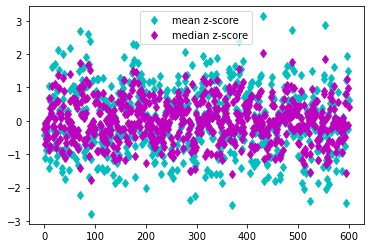

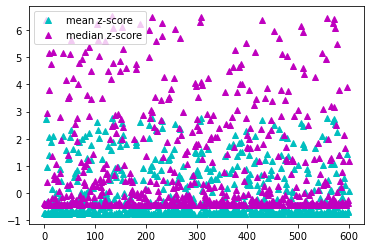

In [90]:
# transform to z-score
zscoren = (datan-np.mean(datan))/np.std(datan)
zscoreu = (datau-np.mean(datau))/np.std(datau)

# transform to modified z-score
dataumed = np.median(datau)
dataumad = robust.mad(datau)

zscoreumod = stats.norm.ppf(.75)*(datau-dataumed)/dataumad

# Modified to normal distrib. data
datanmed = np.median(datan)
datanmad = robust.mad(datan)

zscorenmod = stats.norm.ppf(.75)*(datan-datanmed)/datanmad
zscorenmod2 = (datan-datanmed)/datanmad

print(zscorenmod[0])
print(zscorenmod2[0])
print(np.median(np.abs(datan-datanmed)))
print(robust.mad(datan,c=1))
print(zscoreu[0:10])
print(zscoreumod[0:10])
print(min(datau),min(datau))
print(max(datau),max(datau))

# print(np.corrcoef(zscoren,zscoreu))

plt.plot(zscoren,'cd',label='mean z-score')
plt.plot(zscorenmod,'md',label='median z-score')

plt.legend()
plt.show()

plt.plot(zscoreu,'c^',label='mean z-score')
plt.plot(zscoreumod,'m^',label='median z-score')

plt.legend()
plt.show()

### Scale differences betwen multivariate datasets

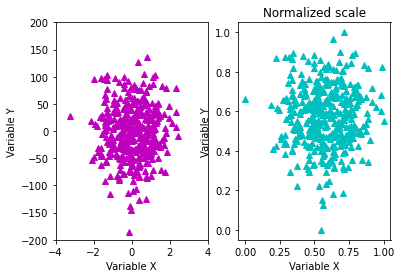

In [154]:
# Scale can differ betwen variables across a dataset
a = np.random.randn(400)
b = np.random.randn(400)*50

plt.subplot(121,aspect='auto')
plt.plot(a,b,'m^')
plt.xlabel('Variable X')
plt.ylabel('Variable Y')
plt.axis([-4,4,-200,200])

# Normalize the data scale
ascaled = (a - min(a))/(max(a)-min(a))
bscaled = (b - min(b))/(max(b)-min(b))

# Plot with the new scale
plt.subplot(122)
plt.plot(ascaled,bscaled,'c^')
plt.xlabel('Variable X')
plt.ylabel('Variable Y')
plt.title('Normalized scale')
plt.show()

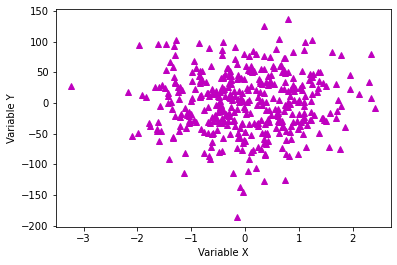

In [271]:
plt.plot(a,b,'m^')
plt.xlabel('Variable X')
plt.ylabel('Variable Y')
plt.show()

### Euclidian distance in multivariate dataset for outliers removal

In [235]:
# Create a two dimensional data
N = 300

data1 = np.random.randn(N)*-2.23
data2 = np.random.randn(N)*3.35

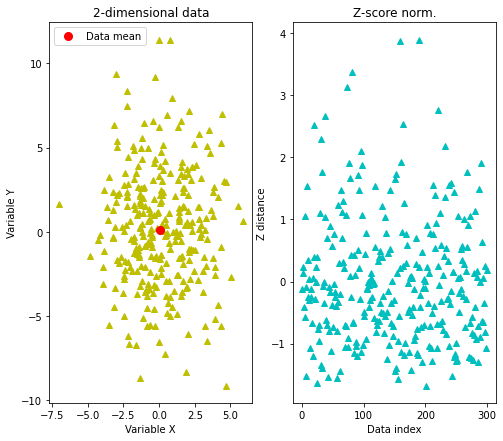

In [269]:
# Compute the data mean
datamean = [np.mean(data1),np.mean(data1)]

# Compute the distance of each data point to the two-dimensional datamean
dist = np.zeros(N)

for i in range(N):
    dist[i] = np.sqrt((data1[i]-datamean[0])**2 + (data2[i]-datamean[1])**2)
    
# Convert to z-scores
distz = ((dist-np.mean(dist))/np.std(dist))

# Plot

fig,ax = plt.subplots(1,2,figsize=(8,7))

ax[0].plot(data1,data2,'y^')
# ax[0].set_xticks([])
# ax[0].set_yticks([])
ax[0].set_xlabel('Variable X')
ax[0].set_ylabel('Variable Y')
ax[0].set_title('2-dimensional data')
ax[0].plot(datamean[0],datamean[1],'ro',markersize=8,label='Data mean')

ax[0].legend()

ax[1].plot(distz,'^c')
ax[1].set_xlabel('Data index')
ax[1].set_ylabel('Z distance')
ax[1].set_title('Z-score norm.')

plt.show()

[ 73  81 158 190]


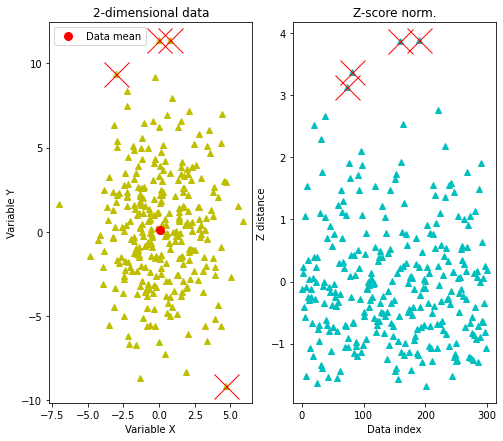

In [270]:
# Outlier removing
distThresh = 3

# Find the outliers
oidx = np.where(abs(distz)>distThresh)[0]
print(oidx)
# print(data1[oidx])
# print(data2[oidx])
# Remove them in the plot
ax[1].plot(oidx,distz[oidx],'rx',markersize=25)
ax[0].plot(data1[oidx],data2[oidx],'rx',markersize=25)
fig